### For attempting to perform hierarchical clustering on the 10 neurons

In [6]:
#import statements

import os
import re

import pandas as pd
import matplotlib as plt
from sklearn.cluster import AgglomerativeClustering

import Neuron_analysis as na

import plotly.graph_objects as go
import plotly.figure_factory as ff

In [7]:
#define useful functions

def find_mousename(text):
    #finds name of mouse that follows the typical LSENS pattern: two letters followed by 3 numbers, ie AL000
    a= re.search('[a-zA-Z]{2}[0-9]{2,3}', text)
    return a[0]

def prep_df(df):
    # prepares df so that we only keep the id and total count
    # input is the full path and name of the .csv file
    read_file= pd.read_excel(df)
    new= read_file.set_index('id').T
    new_series=new.loc['Total_counts']

    full_df= new_series.to_frame()
    full_df.rename(columns={'Total_counts': find_mousename(df)}, inplace=1)
    return full_df

def combine_df(folder,list_of_fname,inner=False):
    # combine multiple data frames, keeping only mouse name, region id and amount of um
    # by default, returns all of the regions that at least one brain that projects to it
    # if inner=True, then only return regions that overlaps in all brains
    
    #initialize a dataframe which will later be removed
    full_name_initial=os.path.join(folder, list_of_fname[0])
    full_df=prep_df(full_name_initial)
    
    if inner==True:
        for i in (list_of_fname):
            new_df=prep_df(os.path.join(folder, i))
            full_df=full_df=pd.concat([full_df, new_df],axis=1, join='inner')

    else: 
        for i in (list_of_fname):
            new_df=prep_df(os.path.join(folder, i))
            full_df=full_df=pd.concat([full_df, new_df],axis=1)

    full_df=full_df.T.iloc[1:]
    return full_df

In [8]:
#find all relevant files
folder= 'M:\\analysis\Yanqi_Liu\Complete_points'
files= [ i for i  in os.listdir(folder) if 'with_counts' in i]

## load all dendrite and axonal csv files

In [83]:
dendrite_files= [i for i in files if 'dendrite' in i]
# identify files with dendritic information
# start testing with dendrites since they are less complicated 
dendrite_df= combine_df(folder, dendrite_files)
dendrite_df

id,201,981
AL066,4300,2461
AL080,2235,5508
AL092,2358,5617
AL110,2399,5667
AL126,1843,6255
AL131,2722,4452
AL140,1903,6280
AL142,47,5323
AL157,3147,3419
GF243,4130,2483


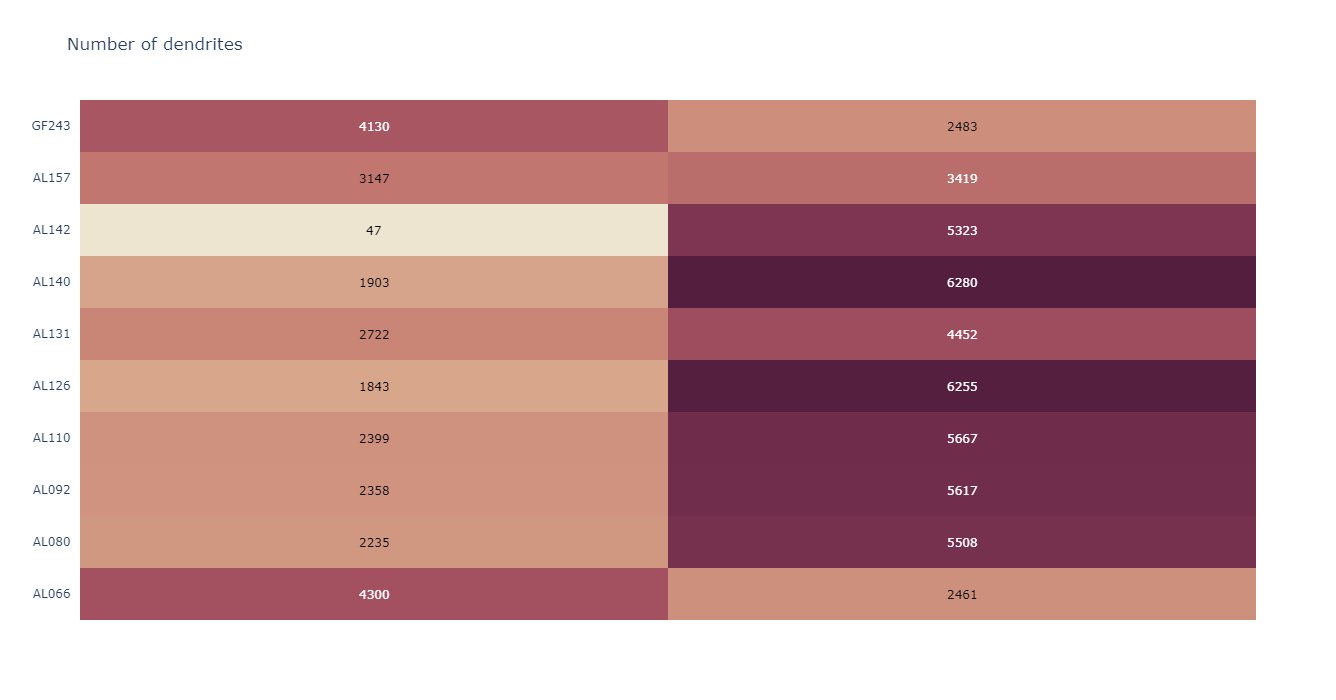

In [92]:
#Plot dendrite informations using annotated heat maps

str_id=[na.give_me_name(i) for i in dendrite_df.columns]

z =dendrite_df.values

fig = ff.create_annotated_heatmap(z, colorscale='Brwnyl',
                                  x=str_id,y=list(dendrite_df.index))
fig.update_xaxes(showticklabels=False,
                type='category')

fig.update_layout(
    title='Number of dendrites',
    width = 700, height = 700,
    autosize = True
)

fig.show()

#some how dendrite_df.index must be put into a list first

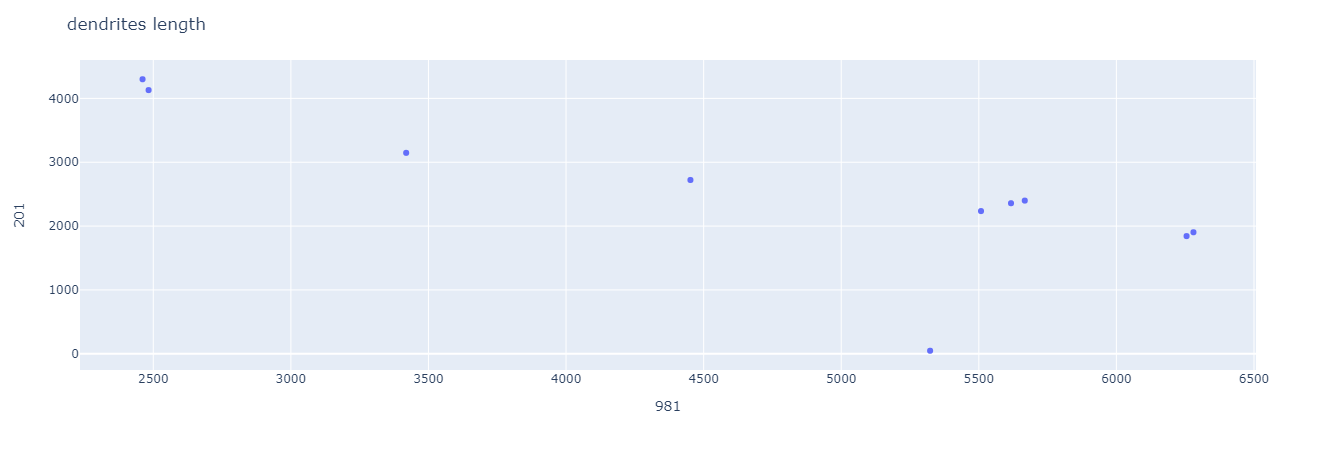

In [93]:
#From annotated heatmap above we already see some signs of clustering, try plotting these in a scatter (since we have only x and y) to see potential groups

data=dendrite_df
fig = px.scatter(data, x=981, y=201)
fig.update_layout(
    title='dendrites length',
    xaxis_title='981',
    yaxis_title='201')

fig.show()

#to do, find ways so that hover info shows the name of mouse..ie name has to be a column in the df to use hover_data= x

In [48]:
axonal_files= [i for i in files if 'axons' in i]
axonal_df= combine_df(folder, axonal_files)

#axonal_df.fillna(0, inplace=True)
#fill  nan values with 0 only for subsequent clustering step
# keep Nan for heatmap display purposes

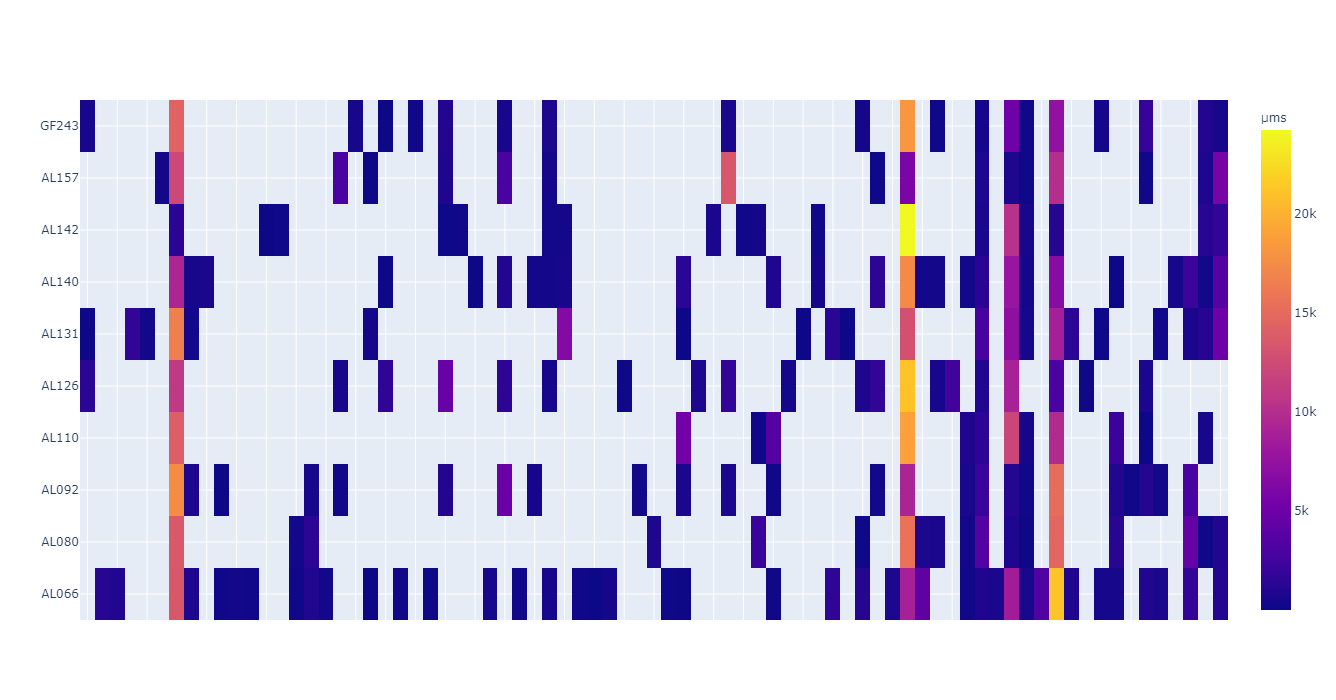

In [46]:
str_id=[na.give_me_name(i) for i in axonal_df.columns]

fig = go.Figure(
    data=go.Heatmap(
        z=axonal_df.values,
        colorbar=dict(title='μms'),
        x=str_id,
        y=axonal_df.index,
        hoverongaps = False)
)

fig.update_xaxes(showticklabels=False,
                type='category')

fig.update_layout(
    width = 1000, height = 700,
    autosize = True
)


fig.show()


In [12]:
axonal_df_inner= combine_df(folder, axonal_files, inner=True)
axonal_df_inner
#by definition then this should not have nan values

id,1038,1047,981,201,1070
AL066,914,8551,8931,13512,21207
AL080,3648,772,15635,13548,14734
AL092,2124,1144,9227,17523,15199
AL110,1495,11934,18933,14040,9805
AL126,944,9014,21147,10995,2959
AL131,2719,7193,13013,16591,8751
AL140,1371,7798,17387,9330,6740
AL142,657,10332,24257,1395,1083
AL157,777,691,5999,12176,9989
GF243,405,5147,18317,14394,7412


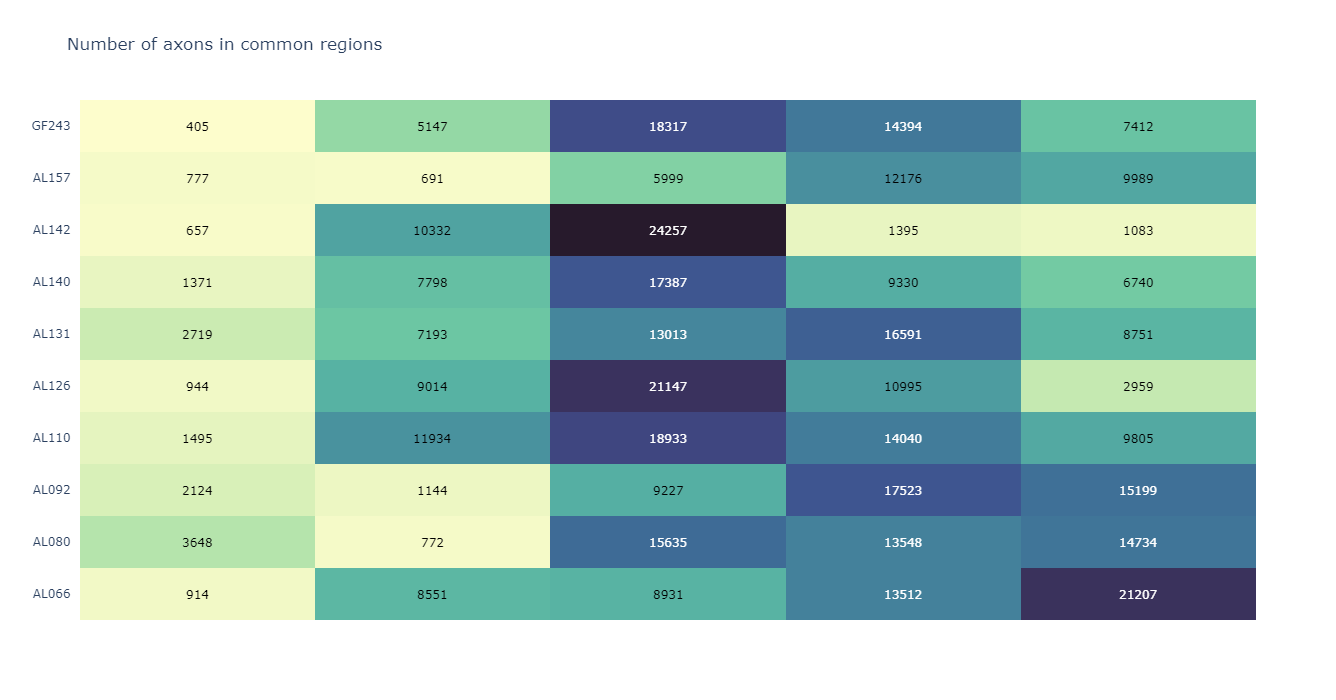

In [91]:
str_id=[na.give_me_name(i) for i in axonal_df_inner.columns]

z =axonal_df_inner.values

fig = ff.create_annotated_heatmap(z, colorscale='deep',
                                  x=str_id,y=list(axonal_df_inner.index))
fig.update_xaxes(showticklabels=False,
                type='category')

fig.update_layout(
    title='Number of axons in common regions',
    width = 700, height = 700,
    autosize = True
)

fig.show()

## Now prepare data for axons

## Try clustering 
Some reference: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import fcluster, linkage
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering 


     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


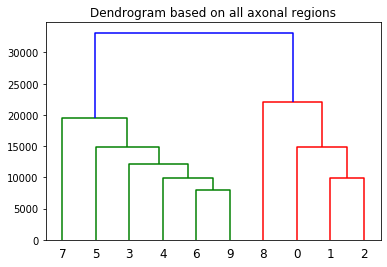

In [129]:
#try on all axonal regions
npdf=axonal_df.to_numpy()
distance_matrix = linkage(npdf, method = 'ward', metric = 'euclidean')
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.title('Dendrogram based on all axonal regions')
plt.show()


In [87]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(npdf)

In [88]:
y_hc

array([1, 1, 1, 0, 0, 0, 0, 3, 2, 0], dtype=int64)

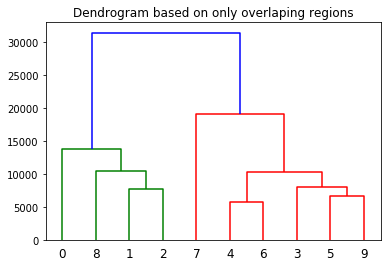

In [89]:
#try on only overlapping axonal regions, for simplicity and practicing purpose

npdf=axonal_df_inner.to_numpy()
distance_matrix = linkage(npdf, method = 'ward', metric = 'euclidean')
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.title('Dendrogram based on only overlaping regions')
plt.show()

In [90]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(npdf)
y_hc

array([3, 0, 0, 1, 1, 1, 1, 2, 0, 1], dtype=int64)

In [21]:
axonal_df.index

Index(['AL066', 'AL080', 'AL092', 'AL110', 'AL126', 'AL131', 'AL140', 'AL142',
       'AL157', 'GF243'],
      dtype='object')

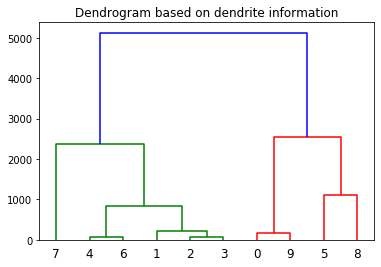

In [130]:
#Try on dendiritic informations
npdf=dendrite_df.to_numpy()
distance_matrix = linkage(npdf, method = 'complete', metric = 'euclidean')
dn = dendrogram(distance_matrix)
 
# Display the dendogram
plt.title('Dendrogram based on dendrite information')
plt.show()

In [152]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='average')
y_hc=hc.fit_predict(npdf)
y_hc

array([3, 1, 1, 1, 1, 0, 1, 2, 0, 3], dtype=int64)

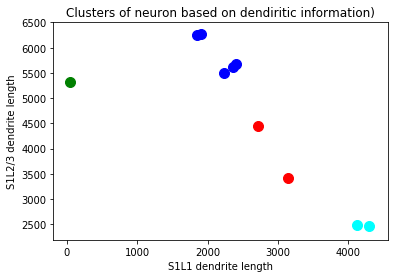

In [151]:
plt.scatter(npdf[y_hc==0, 0], npdf[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(npdf[y_hc==1, 0], npdf[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(npdf[y_hc==2, 0], npdf[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(npdf[y_hc==3, 0], npdf[y_hc==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.title('Clusters of neuron based on dendiritic information)')
plt.xlabel('S1L1 dendrite length')
plt.ylabel('S1L2/3 dendrite length')
plt.show()
# Note,npdf[y_hc==0, 1] that ,1 shows the second item of each matching item(==0). Nice way of indexing

In [117]:
dendrite_df['cluster']=y_hc
#assign cluster group to each brain

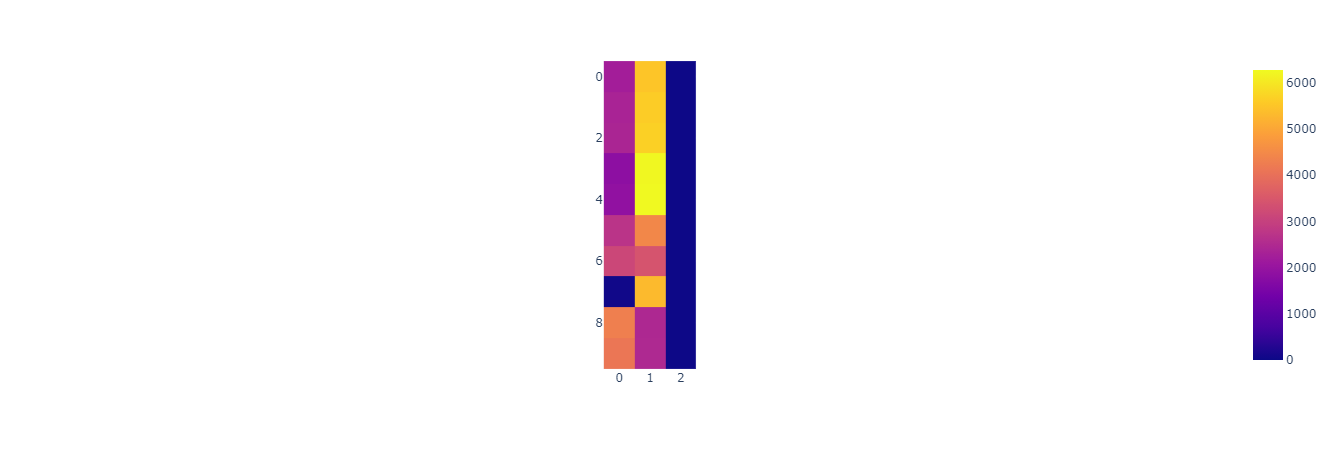

In [118]:
fig = px.imshow(dendrite_df.sort_values(['cluster']))
fig.show()

In [120]:
dendrite_df.sort_values(['cluster'])

id,201,981,cluster
AL080,2235,5508,0
AL092,2358,5617,0
AL110,2399,5667,0
AL126,1843,6255,0
AL140,1903,6280,0
AL131,2722,4452,1
AL157,3147,3419,1
AL142,47,5323,2
AL066,4300,2461,3
GF243,4130,2483,3


In [72]:
y=dendrite_df.index
list(y)

['AL066',
 'AL080',
 'AL092',
 'AL110',
 'AL126',
 'AL131',
 'AL140',
 'AL142',
 'AL157',
 'GF243']

In [36]:
axonal_df_inner

id,1038,1047,981,201,1070
AL066,914,8551,8931,13512,21207
AL080,3648,772,15635,13548,14734
AL092,2124,1144,9227,17523,15199
AL110,1495,11934,18933,14040,9805
AL126,944,9014,21147,10995,2959
AL131,2719,7193,13013,16591,8751
AL140,1371,7798,17387,9330,6740
AL142,657,10332,24257,1395,1083
AL157,777,691,5999,12176,9989
GF243,405,5147,18317,14394,7412
